In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

#for plot styling
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

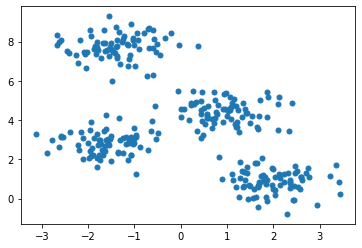

In [2]:
plt.scatter(X[:,0],X[:,1],s=25);    # s is the size of the dot in plot, X[:,0] ia the first column,X[:,1] is the second column

In [3]:
#Assign four clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [4]:
y_kmeans

array([0, 2, 3, 2, 0, 0, 1, 3, 2, 2, 1, 2, 3, 2, 0, 3, 3, 0, 1, 1, 0, 0,
       3, 1, 1, 3, 0, 3, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 0, 3, 1, 3, 3,
       1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2, 3, 2, 1, 1, 1,
       2, 0, 2, 1, 3, 1, 2, 1, 1, 2, 1, 3, 0, 2, 0, 3, 0, 0, 2, 3, 0, 3,
       2, 2, 3, 0, 2, 1, 1, 3, 0, 0, 3, 1, 2, 0, 2, 0, 3, 0, 0, 3, 2, 3,
       1, 1, 0, 2, 0, 3, 2, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       1, 0, 2, 1, 1, 2, 3, 2, 2, 1, 3, 1, 3, 1, 2, 3, 2, 2, 2, 3, 2, 3,
       0, 1, 2, 1, 0, 3, 2, 3, 3, 0, 3, 1, 1, 3, 0, 3, 3, 2, 0, 3, 1, 2,
       0, 0, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 0, 2, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 2, 3, 1, 0, 1, 3, 2, 1, 2, 3, 2, 3, 1, 3, 3, 2, 1, 1, 0, 0, 3,
       2, 0, 0, 1, 0, 1, 3, 2, 2, 3, 3, 2, 3, 0, 1, 3, 0, 1, 2, 1, 0, 3,
       0, 2, 2, 2, 2, 1, 1, 2, 3, 1, 0, 3, 1, 1, 1, 0, 0, 2, 3, 3, 1, 0,
       2, 1, 3, 2, 3, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 2, 0, 0, 3, 0, 0, 0,
       2, 1, 2, 3, 0, 0, 2, 2, 2, 0, 0, 3, 2, 1])

In [6]:
#import library
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseeds=2):
    
    #1. Randomly choose the cluuster
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:

        #2a. Assign lables according to the clostst center
        lables = pairwise_distances_argmin(X, centers)

        #2b. Find new centers from the mean of the points
        new_centers = np.array([X[labels==i].mean(0)
                               for i in range(n_clusters)])
        #2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels
centers, labels = find_clusters(X,4)
plt.scatter(X[:,0],X[:,1], c=y_kmeans, s=50,cmap='viridis')

plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5);

NameError: name 'rseed' is not defined

In [33]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import numpy as np

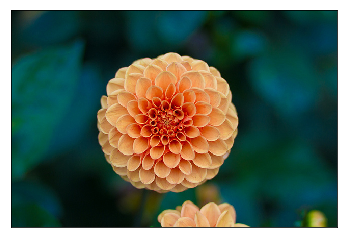

In [29]:
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(china) 

In [30]:
china.shape

(427L, 640L, 3L)

In [31]:
data = china /255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280L, 3L)

In [32]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [39]:
def plot_pixels(data, title, colours = None, N=10000):
    if colors is None:
        colors = data
        
    #choose a random subset
    rng = np.random.Randomstate(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplot(1,2, figsize(16,6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red',ylabel='Green', xlim=(0,1), ylim=(0,1))
    
    ax[0].scatter(R, B, color=colors, marker='.')
    ax[0].set(xlabel='Red',ylabel='Blue', xlim=(0,1), ylim=(0,1))
    
    fig.suptitle(title, size=20)

In [40]:
plot_pixels(data, title = "Input colour space: 16 million possible colours")

UnboundLocalError: local variable 'colors' referenced before assignment